In [96]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import nltk
import numpy as np
import io
plt.rcParams.update({'font.size': 16})

In [25]:
def tokenize(text):
    text = text.encode('ascii','ignore')

    # Remove all punctuation and numbers
    regexp = '[^\W]+'
    cleanTokens = re.findall(regexp, text)
    
    # Remove all words of length 1 and set lowercase
    cleanTokens = [w.lower() for w in cleanTokens if len(w) > 1]
    stopwords = nltk.corpus.stopwords.words('english')

    # Remove stopwords
    cleanTokens = [w for w in cleanTokens if w not in stopwords]
    
    return cleanTokens

In [48]:
def read_file(filename):
    with io.open('./'+filename, encoding='utf-8') as f:
        return f.read()
# Read word list and extract all the various categories
mt_word_list = read_file('Sentiment_Data_Set_S1.txt').splitlines()[3:]
sentiment_dict = {}

# Iterating over every word in list
for row in mt_word_list[1:]:
    cols = row.split("\t")
    word = cols[0]
    # cols[2] is the happiness score avg.
    sentiment_dict[word] = cols[2]

sens = []
for val in sentiment_dict.keys():
    sens.append(float(sentiment_dict[val]))
print(np.median(sens), np.mean(sens))    
    
def get_sentiments(tokens):
    sentiments = []
    for token in tokens:
        if token in sentiment_dict:
            sentiments.append(float(sentiment_dict[token])) # happiness avg
    return np.median(sentiments), np.mean(sentiments)

(5.44, 5.375239679123459)


In [49]:
df = pd.read_fwf("./Scripts/A-New-Hope.txt")
text = " ".join(df.iloc[:,0].tolist())
tokens = tokenize(text)

In [50]:
sentiment_iv = get_sentiments(tokens)

In [75]:
def getSentimentFromFile(filename):
    df = pd.read_fwf(filename)
    lst = df.iloc[:,0].tolist()
    lst_clean = [i for i in lst if not isinstance(i, float)]
    text = " ".join(lst_clean)
    tokens = tokenize(text)
    return get_sentiments(tokens)

In [77]:
def getMovieDatas():
    titles = ["./Scripts/The-Phantom-Menace.txt", "./Scripts/Attack-of-the-Clones.txt", "./Scripts/Revenge-of-the-Sith.txt", "./Scripts/A-New-Hope.txt", "./Scripts/The-Empire-Strikes-Back.txt", "./Scripts/Return-of-the-Jedi.txt", "./Scripts/The-Force-Awakens.txt", "./Scripts/The-Last-Jedi.txt"]
    return [getSentimentFromFile(i) for i in titles]

[(5.44, 5.391031588447652),
 (5.6, 5.5243987068965525),
 (5.5, 5.3854046639231825),
 (5.54, 5.406530083777608),
 (5.56, 5.44491304347826),
 (5.5, 5.411421058398159),
 (5.44, 5.379098520249221),
 (5.6, 5.486519799219186)]

In [90]:
md = getMovieDatas()
median_movs = [i[0] for i in md]
mean_movs = [i[1] for i in md]

In [98]:
mean_movs

[5.391031588447652,
 5.5243987068965525,
 5.3854046639231825,
 5.406530083777608,
 5.44491304347826,
 5.411421058398159,
 5.379098520249221,
 5.486519799219186]

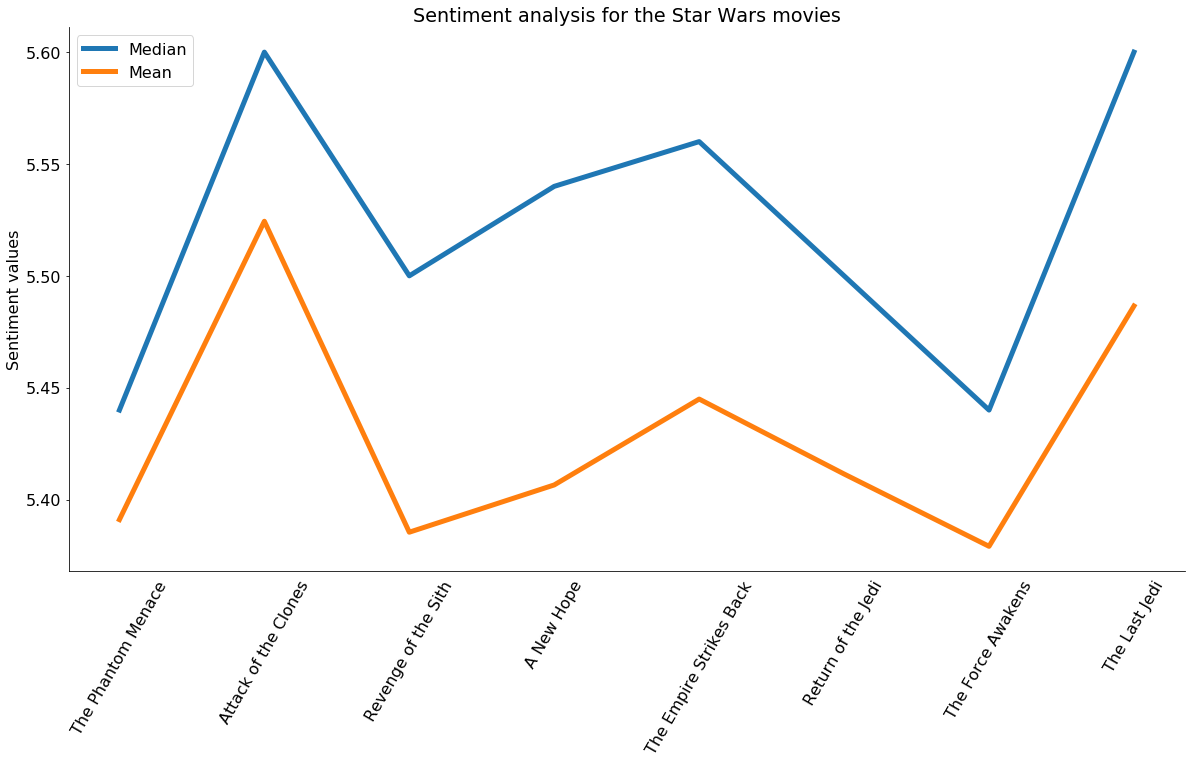

In [97]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_axisbelow(True)
ax1.set_title("Sentiment analysis for the Star Wars movies")
ax1.set_ylabel("Sentiment values")

movie_names = ["HMMM2", "The Phantom Menace", "Attack of the Clones", "Revenge of the Sith", "A New Hope", "The Empire Strikes Back", "Return of the Jedi", "The Force Awakens", "The Last Jedi"]

ax1.plot(median_movs, label="Median", linewidth=5)
ax1.plot(mean_movs, label="Mean", linewidth=5)

ax1.set_xticklabels(movie_names, rotation=60)
plt.legend()

i = 0
for spine in plt.gca().spines.values():
    if i % 2 == 1:
        spine.set_visible(False)
    i += 1
plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True)
    

plt.show()  